In [9]:
from PIL import Image
import glob
import numpy as np
from tqdm import tqdm
import os
import pandas as pd
import math
# import networkx as nx

In [5]:
df = pd.read_csv('labels.csv')
df = df.dropna(subset=['quick_draw_labels'])

label_ids = set()
labels = {}
G = nx.Graph()

for row in df.itertuples():
    label_ids.add(row.id)
    labels[row.id] = row
    G.add_node(row.coco_label)

print(label_ids)
print(len(label_ids))

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 32, 33, 37, 39, 41, 43, 44, 46, 47, 48, 49, 50, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86, 87, 88, 90, 94, 95, 97, 102, 106, 112, 113, 119, 124, 128, 135, 141, 148, 155, 158, 165, 166, 169}
85


In [11]:
from itertools import combinations

df2 = pd.DataFrame(columns=['name', 'objects', 'num'])
df2.to_csv('output.csv')

count = 0
i = 0
for filename in tqdm(glob.glob('data/stuffthingmaps_trainval2017/*/*.png')):

    image = np.asarray(Image.open(filename))

    objects = set(map(lambda x: x + 1, set(image.ravel())))
    qd_objects = objects & label_ids
    
    if len(qd_objects) > 0:
        qd_object_names = list(map(lambda x: labels[x].coco_label, qd_objects))
        new_df = pd.DataFrame.from_dict({
            'index': i,
            'name': [filename],
            'objects': [', '.join(qd_object_names)],
            'num': [len(qd_objects)]
        })
        new_df.to_csv('output.csv', mode='a', header=False, index=False)
        
        for a, b in combinations(qd_object_names, 2):
            G.add_edge(a, b)
        
        i += 1
    
    if len(qd_objects) >= 2:
        count += 1

print('')
print(count)

100%|██████████| 123287/123287 [22:28<00:00, 91.45it/s]
100127



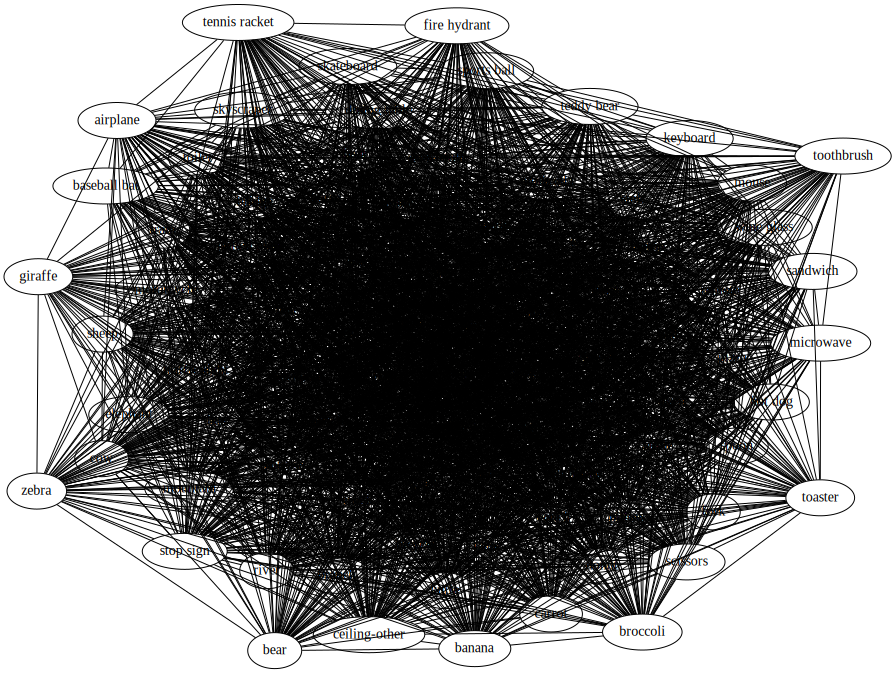

In [12]:
from IPython.display import SVG, display

A = nx.nx_agraph.to_agraph(G)

svg = SVG(A.draw(prog='fdp', format='svg'))
display(svg)

A.draw('label_graph.pdf', prog='fdp')
A.write('label_graph.dot')

In [13]:
print(nx.info(G))
print('-------------------------')

for node, val in G.degree():
    print(f'{node}: {val}')

Name: 
Type: Graph
Number of nodes: 85
Number of edges: 3270
Average degree:  76.9412
-------------------------
bicycle: 84
car: 84
motorcycle: 78
airplane: 64
bus: 75
train: 70
truck: 82
boat: 80
traffic light: 78
fire hydrant: 67
stop sign: 75
bench: 83
bird: 84
cat: 83
dog: 84
horse: 80
sheep: 71
cow: 67
elephant: 71
bear: 61
zebra: 51
giraffe: 52
backpack: 84
umbrella: 84
tie: 83
suitcase: 83
sports ball: 81
baseball bat: 64
skateboard: 66
tennis racket: 64
bottle: 84
wine glass: 80
cup: 84
fork: 72
knife: 81
spoon: 75
banana: 77
apple: 78
sandwich: 75
broccoli: 65
carrot: 76
hot dog: 71
pizza: 74
donut: 75
cake: 80
chair: 84
couch: 82
potted plant: 84
bed: 78
dining table: 84
toilet: 66
tv: 83
laptop: 79
mouse: 72
remote: 75
keyboard: 77
cell phone: 84
microwave: 70
oven: 76
toaster: 54
sink: 78
book: 84
clock: 83
vase: 83
scissors: 72
teddy bear: 83
toothbrush: 55
branch: 83
bridge: 78
bush: 84
ceiling-other: 84
clouds: 83
door-stuff: 84
fence: 84
flower: 84
grass: 84
house: 84
m

In [14]:
print(G['elephant'])

{'grass': {}, 'tree': {}, 'river': {}, 'house': {}, 'fence': {}, 'branch': {}, 'bush': {}, 'mountain': {}, 'bottle': {}, 'clouds': {}, 'boat': {}, 'cow': {}, 'sheep': {}, 'clock': {}, 'zebra': {}, 'bridge': {}, 'car': {}, 'train': {}, 'tie': {}, 'umbrella': {}, 'bench': {}, 'backpack': {}, 'chair': {}, 'dog': {}, 'sports ball': {}, 'ceiling-other': {}, 'bird': {}, 'book': {}, 'table': {}, 'bear': {}, 'door-stuff': {}, 'sea': {}, 'motorcycle': {}, 'truck': {}, 'traffic light': {}, 'flower': {}, 'giraffe': {}, 'tent': {}, 'cell phone': {}, 'potted plant': {}, 'microwave': {}, 'cup': {}, 'oven': {}, 'knife': {}, 'sink': {}, 'suitcase': {}, 'airplane': {}, 'bicycle': {}, 'baseball bat': {}, 'bus': {}, 'horse': {}, 'cat': {}, 'dining table': {}, 'tv': {}, 'banana': {}, 'apple': {}, 'couch': {}, 'skyscraper': {}, 'carrot': {}, 'remote': {}, 'cake': {}, 'teddy bear': {}, 'stop sign': {}, 'fork': {}, 'spoon': {}, 'broccoli': {}, 'vase': {}, 'fire hydrant': {}, 'bed': {}, 'toilet': {}, 'pillow'